In [20]:
import networkx as nx

#Dijkstra algorithm for shortest paths


In [21]:
def dijkstra_shortest_paths(graph, source):
    distances = {node: float('inf') for node in graph.nodes}
    distances[source] = 0
    visited = set()
    previous = {node: None for node in graph.nodes}
    while len(visited) < len(graph.nodes):
        min_distance = float('inf')
        min_node = None
        for node in graph.nodes:
            if node not in visited and distances[node] < min_distance:
                min_distance = distances[node]
                min_node = node
        visited.add(min_node)
        for neighbor in graph.neighbors(min_node):
            edge_weight = graph[min_node][neighbor]['weight']
            new_distance = distances[min_node] + edge_weight
            if new_distance < distances[neighbor]:
                distances[neighbor] = new_distance
                previous[neighbor] = min_node
    shortest_paths = {}
    for node in graph.nodes:
        path = []
        current_node = node
        while current_node is not None:
            path.insert(0, current_node)
            current_node = previous[current_node]
        shortest_paths[node] = path
    return shortest_paths


#Link-state algorithm using built-in shortest path 

Enter the number of nodes and edges (format: 'n,m'): 6,10
Enter edge 1 (format: 'source,destination,weight'): u,v,2
Enter edge 2 (format: 'source,destination,weight'): u,w,5
Enter edge 3 (format: 'source,destination,weight'): u,x,1
Enter edge 4 (format: 'source,destination,weight'): x,v,2
Enter edge 5 (format: 'source,destination,weight'): v,w,3
Enter edge 6 (format: 'source,destination,weight'): x,w,3
Enter edge 7 (format: 'source,destination,weight'): w,y,1
Enter edge 8 (format: 'source,destination,weight'): x,y,1
Enter edge 9 (format: 'source,destination,weight'): w,z,5
Enter edge 10 (format: 'source,destination,weight'): y,z,2


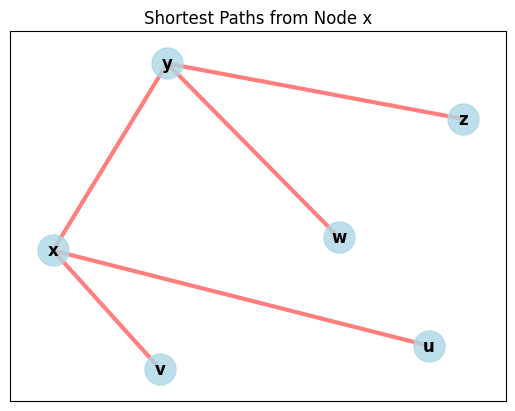

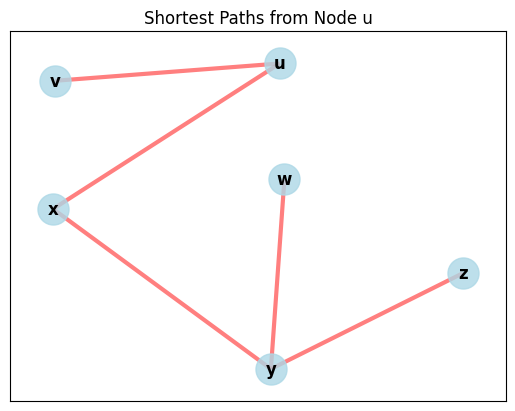

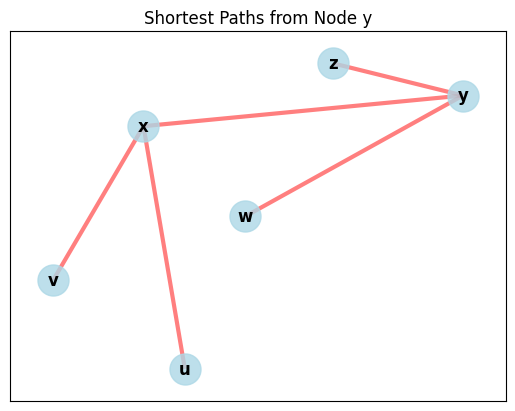

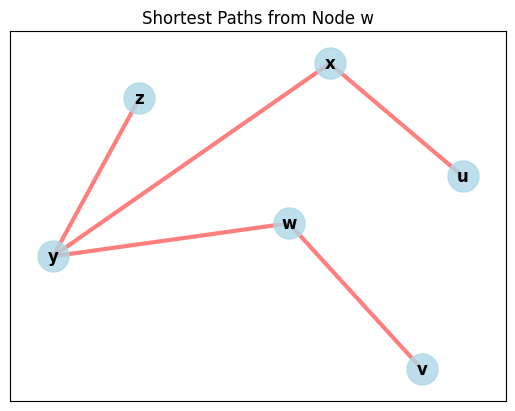

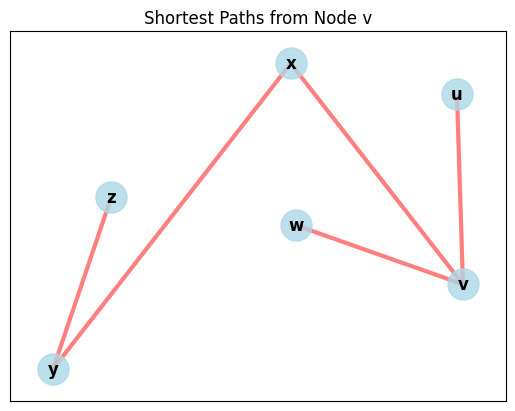

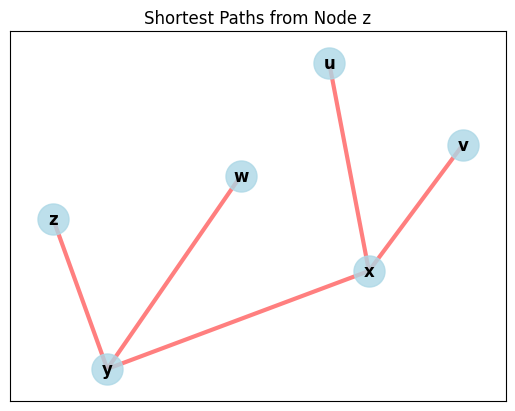

In [5]:
import networkx as nx
import matplotlib.pyplot as plt

filename = input("Enter the input file name: ")
with open(filename, 'r') as file:
    mn = file.readline().strip()
    n, m = map(int, mn.split(","))
    edges = []
    nodes = set()
    for i in range(m):
        edge = file.readline().strip()
        source, destination, weight = edge.split(",")
        edges.append((source, destination, int(weight)))
        nodes.add(source)
G = nx.Graph()
G.add_nodes_from(nodes)
G.add_weighted_edges_from(edges)
plt.figure()
pos = nx.circular_layout(G)
nx.draw_networkx(G, pos, node_color='lightblue', node_size=500, alpha=0.8)
nx.draw_networkx_labels(G, pos, font_size=12, font_weight='bold')
nx.draw_networkx_edge_labels(G, pos, edge_labels=nx.get_edge_attributes(G, 'weight'), font_size=10)
plt.title("Original Graph")
plt.show()
shortest_paths = dict(nx.all_pairs_dijkstra_path(G, weight='weight'))
for source in G.nodes():
    plt.figure()
    pos = nx.spring_layout(G)
    nx.draw_networkx_nodes(G, pos, node_color='lightblue', node_size=500, alpha=0.8)
    nx.draw_networkx_labels(G, pos, font_size=12, font_weight='bold')
    plt.title(f"Shortest Paths from Node {source}")
    subgraph_edges = []
    for destination in G.nodes():
        if source != destination:
            path = shortest_paths[source][destination]
            subgraph_edges.extend([(path[i], path[i + 1]) for i in range(len(path) - 1)])
    subgraph = nx.Graph()
    subgraph.add_edges_from(subgraph_edges)

    nx.draw_networkx_edges(subgraph, pos, width=3.0, alpha=0.5, edge_color='red')

    plt.show()


In [6]:
forwarding_table = {}
for source in G.nodes():
    forwarding_table[source] = {}
    for destination in G.nodes():
        if source != destination:
            path = shortest_paths[source][destination]
            next_hop = path[1]
            forwarding_table[source][destination] = next_hop
for source in forwarding_table:
    print(f"Forwarding table for node {source}:")
    for destination in forwarding_table[source]:
        next_hop = forwarding_table[source][destination]
        print(f"Destination: {destination}, link: {source},{next_hop}")
    print()

Forwarding table for node x:
Destination: u, link: x,u
Destination: y, link: x,y
Destination: w, link: x,y
Destination: v, link: x,v
Destination: z, link: x,y

Forwarding table for node u:
Destination: x, link: u,x
Destination: y, link: u,x
Destination: w, link: u,x
Destination: v, link: u,v
Destination: z, link: u,x

Forwarding table for node y:
Destination: x, link: y,x
Destination: u, link: y,x
Destination: w, link: y,w
Destination: v, link: y,x
Destination: z, link: y,z

Forwarding table for node w:
Destination: x, link: w,y
Destination: u, link: w,y
Destination: y, link: w,y
Destination: v, link: w,v
Destination: z, link: w,y

Forwarding table for node v:
Destination: x, link: v,x
Destination: u, link: v,u
Destination: y, link: v,x
Destination: w, link: v,w
Destination: z, link: v,x

Forwarding table for node z:
Destination: x, link: z,y
Destination: u, link: z,y
Destination: y, link: z,y
Destination: w, link: z,y
Destination: v, link: z,y



#Link-state algorithm using implemented Dijkstra algorithm to find the shortest path

Enter the input file name: saeed.txt


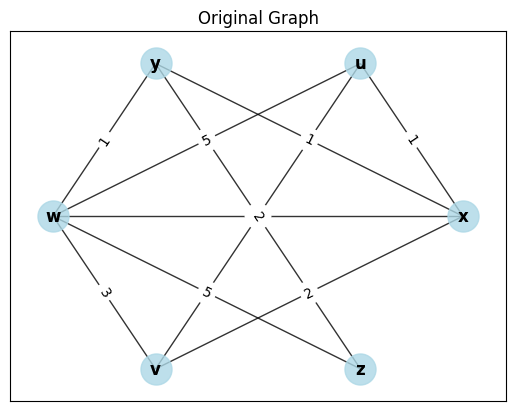

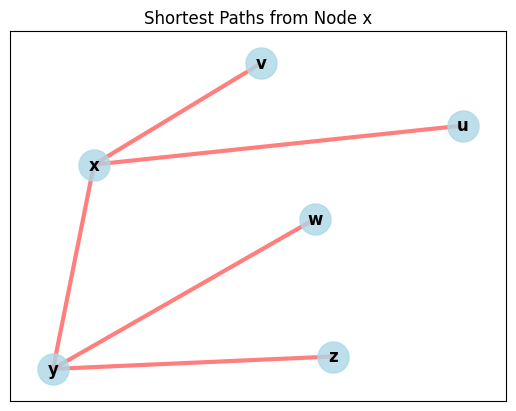

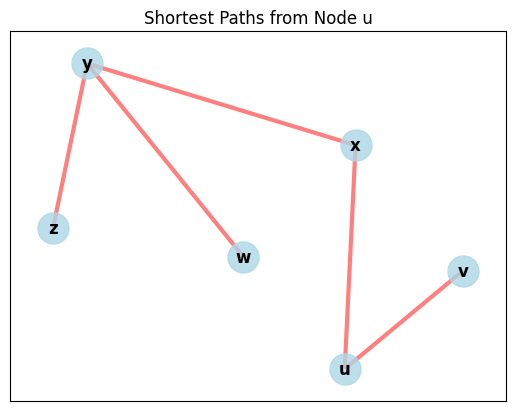

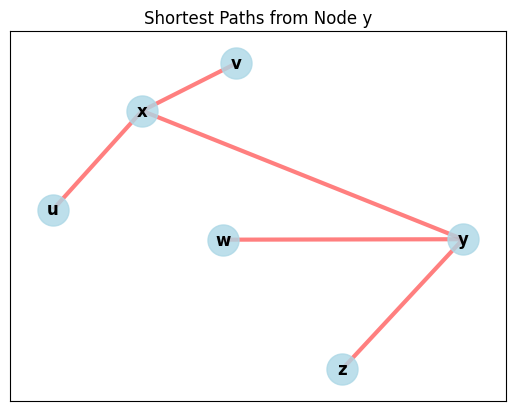

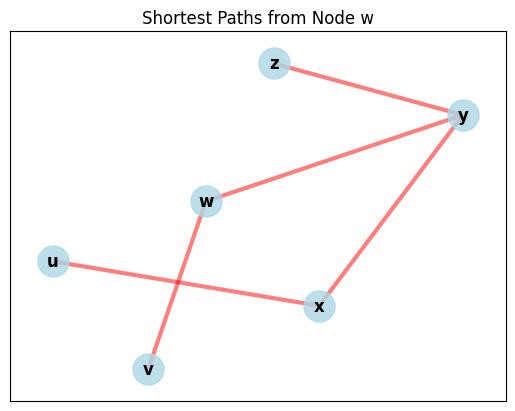

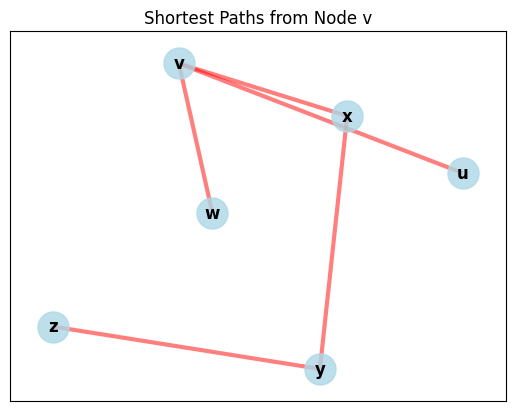

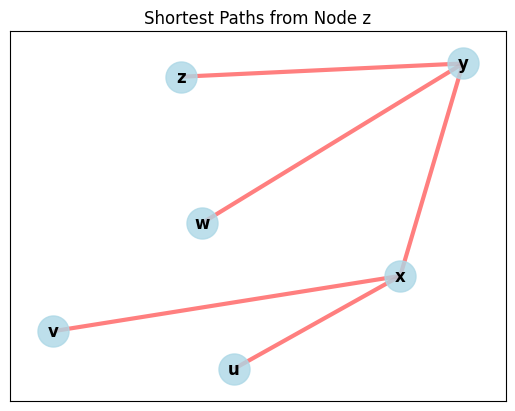

In [18]:
filename = input("Enter the input file name: ")
with open(filename, 'r') as file:
    mn = file.readline().strip()
    n, m = map(int, mn.split(","))
    edges = []
    nodes = set()
    for i in range(m):
        edge = file.readline().strip()
        source, destination, weight = edge.split(",")
        edges.append((source, destination, int(weight)))
        nodes.add(source)
G = nx.Graph()
G.add_nodes_from(nodes)
G.add_weighted_edges_from(edges)
plt.figure()
pos = nx.circular_layout(G)
nx.draw_networkx(G, pos, node_color='lightblue', node_size=500, alpha=0.8)
nx.draw_networkx_labels(G, pos, font_size=12, font_weight='bold')
nx.draw_networkx_edge_labels(G, pos, edge_labels=nx.get_edge_attributes(G, 'weight'), font_size=10)
plt.title("Original Graph")
plt.show()
shortest_paths = {}
for source in G.nodes():
    shortest_paths[source] = dijkstra_shortest_paths(G, source)
for source in G.nodes():
    plt.figure()
    pos = nx.spring_layout(G)
    nx.draw_networkx_nodes(G, pos, node_color='lightblue', node_size=500, alpha=0.8)
    nx.draw_networkx_labels(G, pos, font_size=12, font_weight='bold')
    plt.title(f"Shortest Paths from Node {source}")
    subgraph_edges = []
    for destination in G.nodes():
        if source != destination:
            path = shortest_paths[source][destination]
            subgraph_edges.extend([(path[i], path[i + 1]) for i in range(len(path) - 1)])
    subgraph = nx.Graph()
    subgraph.add_edges_from(subgraph_edges)

    nx.draw_networkx_edges(subgraph, pos, width=3.0, alpha=0.5, edge_color='red')

    plt.show()


In [19]:
forwarding_table = {}
for source in G.nodes():
    forwarding_table[source] = {}
    for destination in G.nodes():
        if source != destination:
            path = shortest_paths[source][destination]
            next_hop = path[1]
            forwarding_table[source][destination] = next_hop
for source in forwarding_table:
    print(f"Forwarding table for node {source}:")
    for destination in forwarding_table[source]:
        next_hop = forwarding_table[source][destination]
        print(f"Destination: {destination}, link: {source},{next_hop}")
    print()

Forwarding table for node x:
Destination: u, link: x,u
Destination: y, link: x,y
Destination: w, link: x,y
Destination: v, link: x,v
Destination: z, link: x,y

Forwarding table for node u:
Destination: x, link: u,x
Destination: y, link: u,x
Destination: w, link: u,x
Destination: v, link: u,v
Destination: z, link: u,x

Forwarding table for node y:
Destination: x, link: y,x
Destination: u, link: y,x
Destination: w, link: y,w
Destination: v, link: y,x
Destination: z, link: y,z

Forwarding table for node w:
Destination: x, link: w,y
Destination: u, link: w,y
Destination: y, link: w,y
Destination: v, link: w,v
Destination: z, link: w,y

Forwarding table for node v:
Destination: x, link: v,x
Destination: u, link: v,u
Destination: y, link: v,x
Destination: w, link: v,w
Destination: z, link: v,x

Forwarding table for node z:
Destination: x, link: z,y
Destination: u, link: z,y
Destination: y, link: z,y
Destination: w, link: z,y
Destination: v, link: z,y

